In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import cartopy
import cartopy.crs as ccrs

In [2]:
def sample_data(shape=(20, 30)):
    """
    Returns ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned crs will be a rotated
    pole CRS, meaning that the vectors will be unevenly spaced in
    regular PlateCarree space.

    """
    crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

    x = np.linspace(311.9, 391.1, shape[1])
    y = np.linspace(-23.6, 24.8, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
    v = 20 * np.cos(6 * np.deg2rad(x2d))

    return x, y, u, v, crs


def main():
    ax = plt.axes(projection=ccrs.Orthographic(-10, 45))

    ax.add_feature(cartopy.feature.OCEAN, zorder=0)
    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

    ax.set_global()
    ax.gridlines()

    x, y, u, v, vector_crs = sample_data()
    ax.quiver(x, y, u, v, transform=vector_crs)

    plt.show()


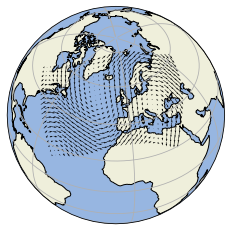

In [3]:
main()

`cartopy.geoaxes.quiver`

  **Cartopy matplotlib.quiver PolyCollection.**

Plot a 2-D field of arrows on a projected plane.

        Extra Kwargs:

        * transform: :class:`cartopy.crs.Projection` or matplotlib transform
            The coordinate system in which the vectors are defined.

        * regrid_shape: int or 2-tuple of ints
            If given, specifies that the points where the arrows are
            located will be interpolated onto a regular grid in
            projection space. If a single integer is given then that
            will be used as the minimum grid length dimension, while the
            other dimension will be scaled up according to the target
            extent's aspect ratio. If a pair of ints are given they
            determine the grid length in the x and y directions
            respectively.

        * target_extent: 4-tuple
            If given, specifies the extent in the target CRS that the
            regular grid defined by *regrid_shape* will have. Defaults
            to the current extent of the map projection.

        See :func:`matplotlib.pyplot.quiver` for details on arguments
        and other keyword arguments.

        .. note::

           The vector components must be defined as grid eastward and
           grid northward.



`matplotlib.quiver`

  **Specialized PolyCollection for arrows.**

Plot a 2-D field of barbs.

Call signatures::

        barb(U, V, **kw)
        barb(U, V, C, **kw)
        barb(X, Y, U, V, **kw)
        barb(X, Y, U, V, C, **kw)

*Arguments:*

    *X*, *Y*:
        The x and y coordinates of the barb locations
        (default is head of barb; see *pivot* kwarg)

    *U*, *V*:
        Give the x and y components of the barb shaft

    *C*:
        An optional array used to map colors to the barbs

All arguments may be 1-D or 2-D arrays or sequences. If *X* and *Y*
are absent, they will be generated as a uniform grid.  If *U* and *V*
are 2-D arrays but *X* and *Y* are 1-D, and if ``len(X)`` and ``len(Y)``
match the column and row dimensions of *U*, then *X* and *Y* will be
expanded with :func:`numpy.meshgrid`.

    *U*, *V*, *C* may be masked arrays, but masked *X*, *Y* are not
    supported at present.

*Keyword arguments:*

    *length*:
        Length of the barb in points; the other parts of the barb
        are scaled against this.
        Default is 9

    *pivot*: [ 'tip' | 'middle' ]
        The part of the arrow that is at the grid point; the arrow rotates
        about this point, hence the name *pivot*.  Default is 'tip'

    *barbcolor*: [ color | color sequence ]
        Specifies the color all parts of the barb except any flags.  This
        parameter is analagous to the *edgecolor* parameter for polygons,
        which can be used instead. However this parameter will override
        facecolor.

    *flagcolor*: [ color | color sequence ]
        Specifies the color of any flags on the barb.  This parameter is
        analagous to the *facecolor* parameter for polygons, which can be
        used instead. However this parameter will override facecolor.  If
        this is not set (and *C* has not either) then *flagcolor* will be
        set to match *barbcolor* so that the barb has a uniform color. If
        *C* has been set, *flagcolor* has no effect.

    *sizes*:
        A dictionary of coefficients specifying the ratio of a given
        feature to the length of the barb. Only those values one wishes to
        override need to be included.  These features include:

        - 'spacing' - space between features (flags, full/half barbs)

        - 'height' - height (distance from shaft to top) of a flag or
          full barb

        - 'width' - width of a flag, twice the width of a full barb

        - 'emptybarb' - radius of the circle used for low magnitudes

    *fill_empty*:
        A flag on whether the empty barbs (circles) that are drawn should
        be filled with the flag color.  If they are not filled, they will
        be drawn such that no color is applied to the center.  Default is
        False

    *rounding*:
        A flag to indicate whether the vector magnitude should be rounded
        when allocating barb components.  If True, the magnitude is
        rounded to the nearest multiple of the half-barb increment.  If
        False, the magnitude is simply truncated to the next lowest
        multiple.  Default is True

    *barb_increments*:
        A dictionary of increments specifying values to associate with
        different parts of the barb. Only those values one wishes to
        override need to be included.

        - 'half' - half barbs (Default is 5)

        - 'full' - full barbs (Default is 10)

        - 'flag' - flags (default is 50)

    *flip_barb*:
        Either a single boolean flag or an array of booleans.  Single
        boolean indicates whether the lines and flags should point
        opposite to normal for all barbs.  An array (which should be the
        same size as the other data arrays) indicates whether to flip for
        each individual barb.  Normal behavior is for the barbs and lines
        to point right (comes from wind barbs having these features point
        towards low pressure in the Northern Hemisphere.)  Default is
        False

Barbs are traditionally used in meteorology as a way to plot the speed
and direction of wind observations, but can technically be used to
plot any two dimensional vector quantity.  As opposed to arrows, which
give vector magnitude by the length of the arrow, the barbs give more
quantitative information about the vector magnitude by putting slanted
lines or a triangle for various increments in magnitude, as show
schematically below::

     :     /\    \\
     :    /  \    \\
     :   /    \    \    \\
     :  /      \    \    \\
     : ------------------------------

.. note the double \\ at the end of each line to make the figure
.. render correctly

The largest increment is given by a triangle (or "flag"). After those
come full lines (barbs). The smallest increment is a half line.  There
is only, of course, ever at most 1 half line.  If the magnitude is
small and only needs a single half-line and no full lines or
triangles, the half-line is offset from the end of the barb so that it
can be easily distinguished from barbs with a single full line.  The
magnitude for the barb shown above would nominally be 65, using the
standard increments of 50, 10, and 5.

linewidths and edgecolors can be used to customize the barb.
Additional :class:`~matplotlib.collections.PolyCollection` keyword
arguments:



In [5]:
print( 'matplotlib.__version__ => ' + matplotlib.__version__ )


matplotlib.__version__ => 3.1.2
